<a href="https://colab.research.google.com/github/Monkeyokay/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [3]:
n=100

In [12]:
x = torch.ones(n,2) 
# rank two tensor of n times 2
# torch.ones makes the tensor filled with values of 1

x[:,0].uniform_(-1.,1)
# : denotes "every single value of the dimension"
# Every single row in column 0
# _ denotes "don't return values but replace whatever is this called on"

x[:5]
# slicing technique. Selects first 5 rows



tensor([[ 0.0543,  1.0000],
        [ 0.1734,  1.0000],
        [-0.6111,  1.0000],
        [-0.2339,  1.0000],
        [-0.8482,  1.0000]])

In [20]:
a = tensor(3.,2)
a
# . denotes float for the whole tensor. Equal to "tensor(3.0,2.0)"

tensor([3., 2.])

In [15]:
y = x@a + 0.25*torch.randn(n)

# x@a is a matrix product of x and a

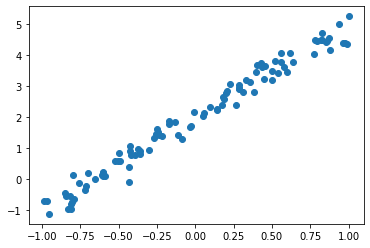

In [16]:
plt.scatter(x[:,0], y);
# plotting zero index column against y.
# The column of ones is just there to assist the matrix multiplication

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [ ]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [22]:
a = tensor(-1.,1)

In [24]:
y_hat = x@a
mse(y_hat, y)

tensor(6.3600)

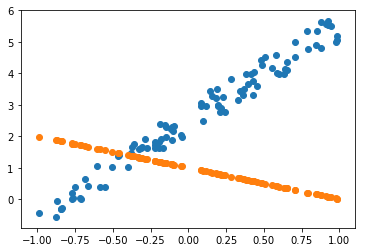

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [25]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [26]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

# loss.backward() calculates gradient and puts it in .grad
# a_sub subtracts

In [27]:
lr = 1e-1
for t in range(100): update()

tensor(6.3600, grad_fn=<MeanBackward0>)
tensor(1.4099, grad_fn=<MeanBackward0>)
tensor(0.4065, grad_fn=<MeanBackward0>)
tensor(0.1548, grad_fn=<MeanBackward0>)
tensor(0.0909, grad_fn=<MeanBackward0>)
tensor(0.0747, grad_fn=<MeanBackward0>)
tensor(0.0706, grad_fn=<MeanBackward0>)
tensor(0.0696, grad_fn=<MeanBackward0>)
tensor(0.0693, grad_fn=<MeanBackward0>)
tensor(0.0693, grad_fn=<MeanBackward0>)


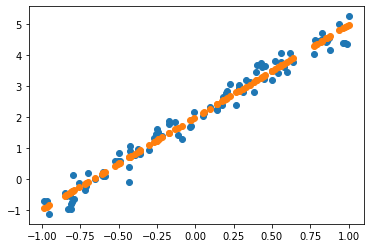

In [28]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach());

## Animate it!

In [29]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [30]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.